In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

## Load Data

In [2]:
df = pd.read_csv('original_mfcc_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-9.620732,-6.468153,-5.925110,-6.729927,-8.394912,-12.471506,-13.474622,-14.074455,-13.747945,-12.962654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
1,-16.037386,-11.193971,-8.674429,-10.208759,-11.293220,-12.851307,-12.869898,-12.397981,-12.449426,-14.081515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disgust
2,-7.326170,-6.825267,-9.066109,-11.684609,-12.352726,-11.807521,-11.920674,-10.837593,-11.293701,-12.753458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
3,-7.011128,-5.996286,-5.341102,-7.025241,-10.693501,-12.206599,-13.182552,-13.513250,-12.829860,-13.151039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Happy
4,-13.136120,-11.512733,-10.225630,-9.838783,-9.236116,-11.287755,-15.745927,-17.706661,-18.655682,-16.432726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [3]:
# different possible emotions
df['label'].unique()

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [3]:
dfC = df.copy() # make a copy before making edits

# label encode the target emotions
dfC['label'] = dfC['label'].map({'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5})
dfC.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-9.620732,-6.468153,-5.925110,-6.729927,-8.394912,-12.471506,-13.474622,-14.074455,-13.747945,-12.962654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-16.037386,-11.193971,-8.674429,-10.208759,-11.293220,-12.851307,-12.869898,-12.397981,-12.449426,-14.081515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-7.326170,-6.825267,-9.066109,-11.684609,-12.352726,-11.807521,-11.920674,-10.837593,-11.293701,-12.753458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,-7.011128,-5.996286,-5.341102,-7.025241,-10.693501,-12.206599,-13.182552,-13.513250,-12.829860,-13.151039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,-13.136120,-11.512733,-10.225630,-9.838783,-9.236116,-11.287755,-15.745927,-17.706661,-18.655682,-16.432726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [4]:
# check distribution of target variable
dfC['label'].value_counts() # Neutral emotion has least number of records in the dataset

3    1271
2    1271
5    1271
1    1271
0    1271
4    1087
Name: label, dtype: int64

In [5]:
# separate target and features
def separate(data):
    y = data['label']
    X = data.iloc[:, 0:-1]
    return X, y

In [6]:
X, y = separate(dfC)

In [7]:
# manual train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
acc = accuracy_score(y_test, y_preds)
print('Accuracy of Baseline KNN: ', acc)

Accuracy of Baseline KNN:  0.30020147750167897


In [10]:
len(y_preds) # confirm shape of predictions

1489

In [11]:
cate = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

In [14]:
from sklearn.metrics import confusion_matrix, classification_report 

In [15]:
cf_matrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cf_matrix, index = [i for i in cate], columns = [i for i in cate])

<Figure size 864x720 with 0 Axes>

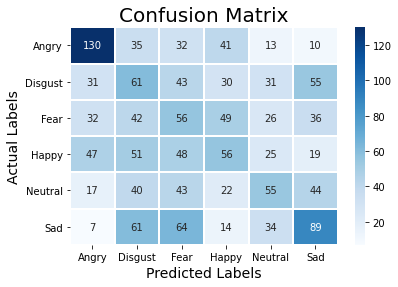

In [16]:
sns.heatmap(cm, linecolor="white", annot=True, linewidth=1, cmap="Blues", fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [17]:
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[130  35  32  41  13  10]
 [ 31  61  43  30  31  55]
 [ 32  42  56  49  26  36]
 [ 47  51  48  56  25  19]
 [ 17  40  43  22  55  44]
 [  7  61  64  14  34  89]]
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       261
           1       0.21      0.24      0.23       251
           2       0.20      0.23      0.21       241
           3       0.26      0.23      0.24       246
           4       0.30      0.25      0.27       221
           5       0.35      0.33      0.34       269

    accuracy                           0.30      1489
   macro avg       0.30      0.30      0.30      1489
weighted avg       0.31      0.30      0.30      1489



By observing the baseline KNN confusion matrix, we see that the majority of Fear-labeled instances are classified as Happy and Disgust, whereas KNN was able to distinguish quite well between happiness and sadness. 

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# training model using k-fold cross-validation
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
scores

array([0.27785235, 0.34765101, 0.32930108, 0.27688172, 0.32795699,
       0.31854839, 0.33602151, 0.27956989, 0.30510753, 0.29704301])

With 10 folds of cross validation, the scores are observed to not significantly vary from the baseline KNN classifier and lie within the range of -/+ 5%. 

In [21]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
scores.mean()

0.30959334632315794

In [22]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.2753301580428664, 0.282183012196002, 0.29037977195641196, 0.30435664285198816, 0.30959334632315794, 0.31362813018690916, 0.31792812297033995, 0.32236126145630367, 0.3290822328065238, 0.32397596882442087, 0.33069405354694376, 0.3310989030814751, 0.33687666883163747, 0.334995128815761, 0.3347248682976113, 0.3368752255177888, 0.336471458468644, 0.3396985278198744, 0.3379508551634553, 0.3382214765100671, 0.3407748791224652, 0.341580428664213, 0.34104441798369056, 0.3411799090712275, 0.3411784657573789, 0.34117810492891676, 0.33929728656996466, 0.34198527819874436, 0.3440006855740781, 0.3454773760554233]


In [23]:
print('Length of list', len(k_scores)) # length of scores should be 30 due to running k-fold cv method 30 times
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.3454773760554233


Text(0.5, 1.0, 'CV Accuracy vs. K Neighbors')

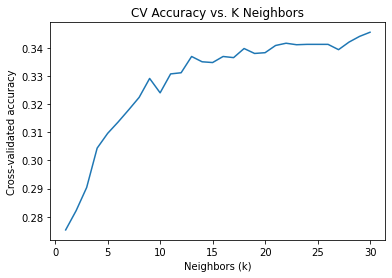

In [24]:
plt.plot(k_range, k_scores)
plt.xlabel('Neighbors (k)')
plt.ylabel('Cross-validated accuracy')
plt.title('CV Accuracy vs. K Neighbors')

From the elbow method, we found that 20 neighbors is where the median CV takes place. Let's retrain KNN with the elbow method-verified k value and observe the average cross-validated mean.

In [20]:
# 10-fold cross-validation with best KNN model
# calculate mean directly on results
knn = KNeighborsClassifier(n_neighbors = 20)
y_pred = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean()

In [21]:
y_pred

0.3382214765100671

And as expected, the model with k = 20 neighbors performs slightly better than sklearn's default model with k = 5 neighbors.

## SVC

In [22]:
from sklearn.svm import SVC

In [24]:
# baseline SVM classifier
best_svc = SVC(kernel = 'rbf')
best_svc.fit(X_train, y_train)
y_preds = best_svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_preds)
print('Accuracy of Baseline SVC: ', svc_acc)

Accuracy of Baseline SVC:  0.3707186030893217


In [25]:
cf_matrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cf_matrix, index = [i for i in cate], columns = [i for i in cate])

<Figure size 864x720 with 0 Axes>

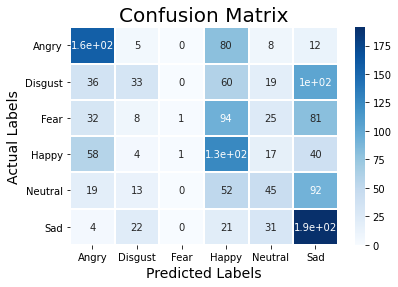

In [28]:
sns.heatmap(cm, linecolor="white", annot=True, linewidth=1, cmap="Blues")
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [29]:
y_preds = best_svc.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[156   5   0  80   8  12]
 [ 36  33   0  60  19 103]
 [ 32   8   1  94  25  81]
 [ 58   4   1 126  17  40]
 [ 19  13   0  52  45  92]
 [  4  22   0  21  31 191]]
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       261
           1       0.39      0.13      0.20       251
           2       0.50      0.00      0.01       241
           3       0.29      0.51      0.37       246
           4       0.31      0.20      0.25       221
           5       0.37      0.71      0.48       269

    accuracy                           0.37      1489
   macro avg       0.39      0.36      0.31      1489
weighted avg       0.40      0.37      0.32      1489



The second algorithm we used is the SVM Classifier, specifically, the non-linear SVM as the boundary the algorithm calculates doesn’t have to be a straight line. We think the algorithm’s kernel trick can help compute a much more optimal hyperplane for our unstructured audio data. The baseline SVC accuracy aligns with our hypothesis that our unstructured data may be better comprehended by selecting the appropriate non-linear kernel function. Our confusion matrix shows Fear having the least quantity of true predictions and are largely misclassified as Happiness. 

In [30]:
# run cross validation on SVC
best_svc = SVC(kernel = 'rbf')
svc_scores = cross_val_score(best_svc, X, y, cv = 10, scoring = 'accuracy')
svc_scores

array([0.29261745, 0.38791946, 0.36155914, 0.35752688, 0.3844086 ,
       0.38172043, 0.37096774, 0.35080645, 0.35483871, 0.36290323])

In [31]:
print('Average k-fold score: ', svc_scores.mean())
print('Length of list', len(svc_scores)) 
print('Max of list', max(svc_scores))

Average k-fold score:  0.3605268095547377
Length of list 10
Max of list 0.38791946308724834


The maximum cross-validated score of ~38.8% is above KNN's maximum cross-validated score by around 4%. 

In [30]:
# any improvement using poly kernel?
svc2 = SVC(kernel = 'poly')
svc_scores2 = cross_val_score(svc2, X, y, cv = 10, scoring = 'accuracy')
svc_scores2

array([0.29932886, 0.37449664, 0.34811828, 0.35349462, 0.3844086 ,
       0.36021505, 0.36021505, 0.3266129 , 0.34408602, 0.37096774])

In [31]:
print('Average k-fold score: ', svc_scores2.mean())
print('Length of list', len(svc_scores2)) 
print('Max of list', max(svc_scores2)) # not really any improvement

Average k-fold score:  0.35219437829255973
Length of list 10
Max of list 0.3844086021505376


A polynomial kernel did not perform significantly worse, but also rarely yields any improvement when compared to the performance of a SVC with RBF kernel. Thus, we decided to stick with the radial basis fuction kernel for re-training with dimensionality reduction.

## SVC + PCA

In [33]:
from sklearn.preprocessing import StandardScaler

In [43]:
# standardize the input

x_train = StandardScaler().fit_transform(X_train.values)
print(x_train)
print(len(x_train[0]))

[[ 1.46850379  1.59553021  1.59989492 ...  0.0129619   0.0129619
   0.0129619 ]
 [ 3.13502789  2.60916479  1.71793892 ...  0.0129619   0.0129619
   0.0129619 ]
 [-0.03955548 -0.19659917 -0.65111816 ...  0.0129619   0.0129619
   0.0129619 ]
 ...
 [-0.8678988  -0.8833919  -1.0148304  ...  0.0129619   0.0129619
   0.0129619 ]
 [-1.75540892 -1.85158417 -1.74823275 ...  0.0129619   0.0129619
   0.0129619 ]
 [-0.11491408 -0.56256621 -0.90848114 ...  0.0129619   0.0129619
   0.0129619 ]]
216


In [35]:
print(np.mean(x_train))
print(np.std(x_train))

-5.282730582360091e-18
1.0000000000000002


In [38]:
# testing on three levels of explained variance (90%, 95%, 98%)
from sklearn.decomposition import PCA

In [44]:
# set number of components equal to number of input features
pca = PCA().fit(x_train) # fit as many principal components possible

# confirm findings by how much variance is explained by the principal components derived
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([3.41199142e-01, 1.71398925e-01, 1.00160591e-01, 6.20643323e-02,
       4.45954169e-02, 3.70752336e-02, 3.03630050e-02, 2.19464635e-02,
       1.58612376e-02, 1.26921483e-02, 1.13940392e-02, 9.59721085e-03,
       8.90723290e-03, 7.96022197e-03, 7.24699195e-03, 6.40716917e-03,
       6.06840296e-03, 5.41159359e-03, 5.01656512e-03, 4.58159971e-03,
       4.18010458e-03, 3.86408027e-03, 3.57584104e-03, 3.31152711e-03,
       3.09989236e-03, 2.91232644e-03, 2.88782016e-03, 2.79504985e-03,
       2.54836371e-03, 2.37234293e-03, 2.26473875e-03, 2.12252148e-03,
       1.99861126e-03, 1.89853148e-03, 1.78458326e-03, 1.68808454e-03,
       1.65150605e-03, 1.51829809e-03, 1.45774575e-03, 1.37327118e-03,
       1.33173983e-03, 1.27897149e-03, 1.23056891e-03, 1.17331796e-03,
       1.07504072e-03, 1.05200727e-03, 1.02705707e-03, 9.67312400e-04,
       8.98270873e-04, 8.68489615e-04, 8.46493006e-04, 8.12766324e-04,
       7.75154516e-04, 7.39076853e-04, 7.22256475e-04, 6.97184841e-04,
      

Text(0, 0.5, 'Variance')

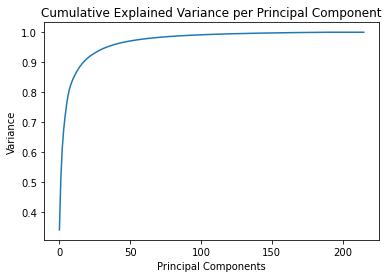

In [45]:
# inverse of scree plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Cumulative Explained Variance per Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance')

In [46]:
np.cumsum(explained_variance_ratio)

array([0.34119914, 0.51259807, 0.61275866, 0.67482299, 0.71941841,
       0.75649364, 0.78685665, 0.80880311, 0.82466435, 0.8373565 ,
       0.84875053, 0.85834775, 0.86725498, 0.8752152 , 0.88246219,
       0.88886936, 0.89493776, 0.90034936, 0.90536592, 0.90994752,
       0.91412763, 0.91799171, 0.92156755, 0.92487908, 0.92797897,
       0.93089129, 0.93377911, 0.93657416, 0.93912253, 0.94149487,
       0.94375961, 0.94588213, 0.94788074, 0.94977927, 0.95156386,
       0.95325194, 0.95490345, 0.95642175, 0.95787949, 0.95925276,
       0.9605845 , 0.96186347, 0.96309404, 0.96426736, 0.9653424 ,
       0.96639441, 0.96742147, 0.96838878, 0.96928705, 0.97015554,
       0.97100203, 0.9718148 , 0.97258995, 0.97332903, 0.97405129,
       0.97474847, 0.97542195, 0.9760727 , 0.97670668, 0.97731697,
       0.97790273, 0.97846554, 0.97901846, 0.97954584, 0.98006304,
       0.98055705, 0.98103535, 0.9815089 , 0.98197007, 0.98242417,
       0.98286203, 0.983275  , 0.98368176, 0.9840783 , 0.98446

In [47]:
np.cumsum(explained_variance_ratio[:65])

array([0.34119914, 0.51259807, 0.61275866, 0.67482299, 0.71941841,
       0.75649364, 0.78685665, 0.80880311, 0.82466435, 0.8373565 ,
       0.84875053, 0.85834775, 0.86725498, 0.8752152 , 0.88246219,
       0.88886936, 0.89493776, 0.90034936, 0.90536592, 0.90994752,
       0.91412763, 0.91799171, 0.92156755, 0.92487908, 0.92797897,
       0.93089129, 0.93377911, 0.93657416, 0.93912253, 0.94149487,
       0.94375961, 0.94588213, 0.94788074, 0.94977927, 0.95156386,
       0.95325194, 0.95490345, 0.95642175, 0.95787949, 0.95925276,
       0.9605845 , 0.96186347, 0.96309404, 0.96426736, 0.9653424 ,
       0.96639441, 0.96742147, 0.96838878, 0.96928705, 0.97015554,
       0.97100203, 0.9718148 , 0.97258995, 0.97332903, 0.97405129,
       0.97474847, 0.97542195, 0.9760727 , 0.97670668, 0.97731697,
       0.97790273, 0.97846554, 0.97901846, 0.97954584, 0.98006304])

In [62]:
def refit(train_data, test_data, n_components):
    refit_pca = PCA(n_components = n_components)
    PCA_X_train = refit_pca.fit_transform(train_data)
    PCA_X_test = refit_pca.transform(test_data)
    
    return PCA_X_train, PCA_X_test

In [63]:
x_test = StandardScaler().fit_transform(X_test.values)

In [71]:
pca_X_train1, pca_X_test1 = refit(x_train, x_test, 17)
pca_X_train2, pca_X_test2 = refit(x_train, x_test, 34)
pca_X_train3, pca_X_test3 = refit(x_train, x_test, 65)

In [74]:
pca_X_train3

array([[-1.23131710e+01,  4.37528554e+00, -3.35341146e+00, ...,
        -1.67939179e-01,  3.65327888e-01, -1.86155309e-01],
       [-9.54576839e+00,  2.83754724e+00, -1.39011343e+00, ...,
        -1.05129885e-01,  3.19135839e-01,  9.73877633e-02],
       [ 5.28597625e+00, -3.13710589e+00,  1.52321460e+00, ...,
         8.05563104e-02, -4.46466953e-01,  4.16989057e-01],
       ...,
       [ 3.36306355e+00, -3.11783113e+00,  2.95590741e+00, ...,
         9.49167209e-02, -2.30763093e-01, -2.65739939e-03],
       [ 7.79569186e+00, -5.11196530e+00,  4.95340073e+00, ...,
         2.60848066e-01, -3.87757724e-01, -3.35466553e-02],
       [ 7.90529247e+00, -2.94637563e+00, -3.39383910e-01, ...,
        -7.95102300e-01, -1.22028726e-01, -1.51807678e-01]])

In [78]:
len(pca_X_test3[0])

65

In [70]:
# SVC keeping only 17 components
final_svm_model = SVC(kernel = 'rbf').fit(pca_X_train1, y_train)
final_pred_train = final_svm_model.predict(pca_X_train1)
final_pred_test = final_svm_model.predict(pca_X_test1)
print('Test Data Accuracy after PCA Transformation: ', accuracy_score(y_test, final_pred_test))

Test Data Accuracy after PCA Transformation:  0.36601746138347885


In [75]:
# SVC keeping first 34 components
final_svm_model2 = SVC(kernel = 'rbf').fit(pca_X_train2, y_train)
final_pred_train2 = final_svm_model2.predict(pca_X_train2)
final_pred_test2 = final_svm_model2.predict(pca_X_test2)
print('Test Data Accuracy after PCA Transformation: ', accuracy_score(y_test, final_pred_test2))

Test Data Accuracy after PCA Transformation:  0.3747481531229013


In [76]:
# SVC keeping first 65 components
final_svm_model3 = SVC(kernel = 'rbf').fit(pca_X_train3, y_train)
final_pred_train3 = final_svm_model3.predict(pca_X_train3)
final_pred_test3 = final_svm_model3.predict(pca_X_test3)
print('Test Data Accuracy after PCA Transformation: ', accuracy_score(y_test, final_pred_test3))

Test Data Accuracy after PCA Transformation:  0.3707186030893217


Despite the slight variation in performance each time the SVM model is refit with the corresponding number of PCA components, we observed that most of the time, it is ideal to keep only the first 17 or 34 components given its boost in performance from our very baseline accuracy of 34.5% to 37.5%.

In [50]:
# cross-validated SVM w/PCA
svc_w_pca = SVC(kernel = 'rbf')
svc_pca_scores = cross_val_score(svc_w_pca, X, y, cv = 10, scoring = 'accuracy')
print(svc_pca_scores)
print('Average k-fold score with RBF kernel: ', svc_pca_scores.mean())
print('Length of list', len(svc_pca_scores)) 
print('Max of list', max(svc_pca_scores))

[0.29261745 0.38791946 0.36155914 0.35752688 0.3844086  0.38172043
 0.37096774 0.35080645 0.35483871 0.36290323]
Average k-fold score:  0.3605268095547377
Length of list 10
Max of list 0.38791946308724834


In [51]:
# cross-validated SVM w/PCA
svc_w_pca2 = SVC(kernel = 'poly')
svc_pca_scores2 = cross_val_score(svc_w_pca2, X, y, cv = 10, scoring = 'accuracy')
print(svc_pca_scores2)
print('Average k-fold score with poly kernel: ', svc_pca_scores2.mean())
print('Length of list', len(svc_pca_scores2)) 
print('Max of list', max(svc_pca_scores2))

[0.29932886 0.37449664 0.34811828 0.35349462 0.3844086  0.36021505
 0.36021505 0.3266129  0.34408602 0.37096774]
Average k-fold score:  0.35219437829255973
Length of list 10
Max of list 0.3844086021505376


When cross validation is performed with SVM + PCA combined, it can be seen that the new combined method with the RBF kernel still yields slightly better performance than the same with a polynomial kernel.